In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('..'))

from log_processing import process_log

In [81]:
file = "../../backtests/test.log"
trader_data, products_data, activities, trades = process_log(file)

In [82]:
kelp = products_data["KELP"]

<Axes: >

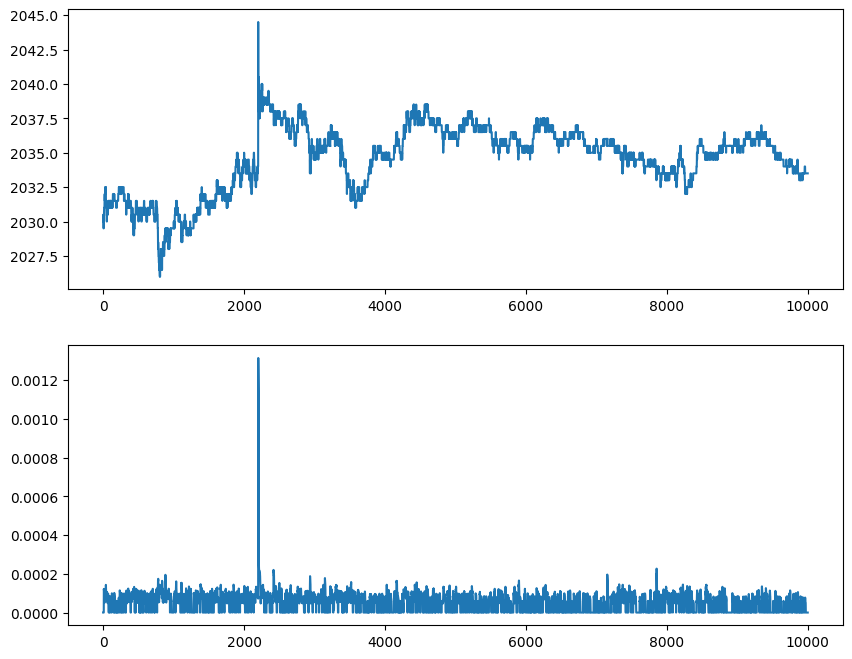

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
kelp["mm_price"].plot(ax=ax[0])

kelp["volatility"].plot(ax=ax[1])